In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
pd.set_option("display.max_columns", None)

In [3]:
match = pd.read_csv("Database/team-FullMatchStats.csv")
match.head()

,playoffs,game,team_x,gamelength_x,result_x,kills_x,assists_x,doublekills_x,triplekills_x,quadrakills_x,pentakills_x,firstblood_x,team kpm_x,ckpm_x,firstdragon_x,dragons_x,elementaldrakes_x,infernals_x,mountains_x,clouds_x,oceans_x,elders_x,firstherald_x,heralds_x,firstbaron_x,barons_x,firsttower_x,towers_x,firstmidtower_x,firsttothreetowers_x,inhibitors_x,damagetochampions_x,dpm_x,damagetakenperminute_x,damagemitigatedperminute_x,wardsplaced_x,wpm_x,wardskilled_x,wcpm_x,controlwardsbought_x,visionscore_x,vspm_x,totalgold_x,earnedgold_x,earned gpm_x,goldspent_x,gspd_x,monsterkills_x,monsterkillsownjungle_x,monsterkillsenemyjungle_x,goldat10_x,xpat10_x,csat10_x,goldat15_x,xpat15_x,csat15_x,team_y,gamelength_y,kills_y,assists_y,doublekills_y,triplekills_y,quadrakills_y,pentakills_y,team kpm_y,ckpm_y,dragons_y,elementaldrakes_y,infernals_y,mountains_y,clouds_y,oceans_y,elders_y,heralds_y,barons_y,towers_y,inhibitors_y,damagetochampions_y,dpm_y,damagetakenperminute_y,damagemitigatedperminute_y,wardsplaced_y,wpm_y,wardskilled_y,wcpm_y,controlwardsbought_y,visionscore_y,vspm_y,totalgold_y,earnedgold_y,earned gpm_y,goldspent_y,gspd_y,monsterkills_y,monsterkillsownjungle_y,monsterkillsenemyjungle_y,goldat10_y,xpat10_y,csat10_y,goldat15_y,xpat15_y,csat15_y
0,0,1,LNG Esports,2142,0,6,12,0.0,0.0,0.0,0.0,1.0,0.1681,0.5322,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,66948,1875.2941,2603.8936,2756.7227,134,3.7535,81,2.2689,56,269.0,7.5350,55362,32136,900.1681,52675.0,-0.147855,191,144,4,14990.0,18271.0,335.0,23475.0,28650.0,533.0,Suning,2142,13,32,2.0,0.0,0.0,0.0,0.3641,0.5322,3.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,11.0,5.0,67812,1899.4958,2659.4398,2703.6695,176,4.9300,79,2.2129,57,385.0,10.7843,67056,43830,1227.7311,61085.0,0.147855,287,176,36,15455.0,19277.0,371.0,22973.0,29622.0,567.0
1,0,2,LNG Esports,1800,0,5,11,1.0,0.0,0.0,0.0,1.0,0.1667,0.6667,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,38629,1287.6333,3047.1667,2708.9000,114,3.8000,38,1.2667,35,224.0,7.4667,47152,27414,913.8000,43775.0,-0.142136,202,142,4,15157.0,19148.0,340.0,24206.0,30770.0,532.0,Suning,1800,15,33,1.0,1.0,0.0,0.0,0.5000,0.6667,3.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8.0,1.0,66173,2205.7667,2235.0000,2445.9333,111,3.7000,47,1.5667,48,211.0,7.0333,55946,36208,1206.9333,50473.0,0.142136,218,151,15,15080.0,18796.0,337.0,24322.0,30943.0,556.0
2,0,1,Team WE,1923,1,16,38,1.0,1.0,0.0,0.0,1.0,0.4992,0.7488,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,10.0,1.0,1.0,2.0,65407,2040.7800,2816.3495,2915.4446,109,3.4009,73,2.2777,46,250.0,7.8003,60654,39661,1237.4727,55225.0,0.031545,236,139,34,14803.0,19178.0,326.0,25234.0,31362.0,536.0,Suning,1923,8,19,1.0,0.0,0.0,0.0,0.2496,0.7488,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,58087,1812.3869,2756.9735,2851.7941,142,4.4306,45,1.4041,50,280.0,8.7363,55554,34561,1078.3463,53510.0,-0.031545,213,135,33,15182.0,18331.0,335.0,23743.0,29787.0,560.0
3,0,2,Suning,1874,1,15,42,3.0,1.0,0.0,0.0,0.0,0.4803,0.7044,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,72351,2316.4674,2981.2380,2278.1430,119,3.8100,69,2.2092,41,253.0,8.1003,58947,38454,1231.1846,52150.0,0.093852,194,134,16,15500.0,18492.0,339.0,25514.0,30019.0,531.0,Team WE,1874,7,21,0.0,0.0,0.0,0.0,0.2241,0.7044,3.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,60311,1930.9819,3077.9936,2885.3148,118,3.7780,67,2.1451,41,245.0,7.8442,48511,28018,897.0544,47475.0,-0.093852,220,145,16,15186.0,18160.0,324.0,24351.0,28343.0,504.0
4,0,3,Team WE,2440,0,11,25,1.0,0.0,0.0,0.0,0.0,0.2705,0.8607,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,4.0,1.0,1.0,0.0,81694,2008.8689,3806.5574,4638.2213,126,3.0984,106,2.6066,51,307.0,7.5492,69083,42817,1052.8770,70235.0,0.014846,246,179,7,15181.0,19035.0,359.0,25649.0,30511.0,563.0,Suning,2440,24,57,3.0,0.0,0.0,0.0,0.5902,0.8607,4.0,4.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,11.0,4.0,127443,3133.8443,3101.5820,3393.4426,206,5.0656,63,1.5492,49,417.0,10.2541,77305,51039,1255.0574,69200.0,-0.014846,32

In [4]:
shuffled = match.sample(frac=1)

In [5]:
test = pd.read_csv("Database/teamTest.csv")
test

,playoffs,game,team_x,gamelength_x,result_x,kills_x,assists_x,doublekills_x,triplekills_x,quadrakills_x,pentakills_x,firstblood_x,team kpm_x,ckpm_x,firstdragon_x,dragons_x,elementaldrakes_x,infernals_x,mountains_x,clouds_x,oceans_x,elders_x,firstherald_x,heralds_x,firstbaron_x,barons_x,firsttower_x,towers_x,firstmidtower_x,firsttothreetowers_x,inhibitors_x,damagetochampions_x,dpm_x,damagetakenperminute_x,damagemitigatedperminute_x,wardsplaced_x,wpm_x,wardskilled_x,wcpm_x,controlwardsbought_x,visionscore_x,vspm_x,totalgold_x,earnedgold_x,earned gpm_x,goldspent_x,gspd_x,monsterkills_x,monsterkillsownjungle_x,monsterkillsenemyjungle_x,goldat10_x,xpat10_x,csat10_x,goldat15_x,xpat15_x,csat15_x,team_y,gamelength_y,kills_y,assists_y,doublekills_y,triplekills_y,quadrakills_y,pentakills_y,team kpm_y,ckpm_y,dragons_y,elementaldrakes_y,infernals_y,mountains_y,clouds_y,oceans_y,elders_y,heralds_y,barons_y,towers_y,inhibitors_y,damagetochampions_y,dpm_y,damagetakenperminute_y,damagemitigatedperminute_y,wardsplaced_y,wpm_y,wardskilled_y,wcpm_y,controlwardsbought_y,visionscore_y,vspm_y,totalgold_y,earnedgold_y,earned gpm_y,goldspent_y,gspd_y,monsterkills_y,monsterkillsownjungle_y,monsterkillsenemyjungle_y,goldat10_y,xpat10_y,csat10_y,goldat15_y,xpat15_y,csat15_y
0,1,4,Suning,1963.490196,1,13.627451,31.823529,1.137255,0.235294,0.000000,0.000000,0.411765,0.425816,0.801412,0.392157,2.392157,2.274510,0.490196,0.529412,0.627451,0.686275,0.058824,0.509804,1.098039,0.607843,0.882353,0.568627,6.784314,0.549020,0.647059,1.235294,66178.745098,2005.311482,2821.063171,2623.638145,121.392157,3.677194,50.725490,1.531222,43.019608,255.254902,7.715459,58313.333333,36907.745098,1133.922708,53867.764706,0.024645,221.941176,137.294118,29.000000,15791.627451,18395.392157,324.254902,25168.607843,29578.274510,520.666667,Top Esports,1940.511111,16.555556,39.000000,2.000000,0.444444,0.066667,0.000000,0.530453,0.900840,2.622222,2.400000,0.511111,0.688889,0.711111,0.555556,0.155556,1.133333,0.888889,7.688889,1.333333,71322.555556,2174.571138,2759.887082,2630.478029,105.533333,3.248260,56.777778,1.720336,42.333333,249.822222,7.650260,60387.933333,39216.733333,1221.459220,55701.711111,0.062760,224.222222,138.644444,27.533333,15836.666667,18298.400000,330.244444,25717.577778,29542.977778,527.511111
1,1,3,Top Esports,1940.511111,0,16.555556,39.000000,2.000000,0.444444,0.066667,0.000000,0.444444,0.530453,0.900840,0.600000,2.622222,2.400000,0.511111,0.688889,0.711111,0.555556,0.155556,0.600000,1.133333,0.600000,0.888889,0.533333,7.688889,0.511111,0.533333,1.333333,71322.555556,2174.571138,2759.887082,2630.478029,105.533333,3.248260,56.777778,1.720336,42.333333,249.822222,7.650260,60387.933333,39216.733333,1221.459220,55701.711111,0.062760,224.222222,138.644444,27.533333,15836.666667,18298.400000,330.244444,25717.577778,29542.977778,527.511111,Suning,1963.490196,13.627451,31.823529,1.137255,0.235294,0.000000,0.000000,0.425816,0.801412,2.392157,2.274510,0.490196,0.529412,0.627451,0.686275,0.058824,1.098039,0.882353,6.784314,1.235294,66178.745098,2005.311482,2821.063171,2623.638145,121.392157,3.677194,50.725490,1.531222,43.019608,255.254902,7.715459,58313.333333,36907.745098,1133.922708,53867.764706,0.024645,221.941176,137.294118,29.000000,15791.627451,18395.392157,324.254902,25168.607843,29578.274510,520.666667
2,1,2,Suning,1963.490196,0,13.627451,31.823529,1.137255,0.235294,0.000000,0.000000,0.411765,0.425816,0.801412,0.392157,2.392157,2.274510,0.490196,0.529412,0.627451,0.686275,0.058824,0.509804,1.098039,0.607843,0.882353,0.568627,6.784314,0.549020,0.647059,1.235294,66178.745098,2005.311482,2821.063171,2623.638145,121.392157,3.677194,50.725490,1.531222,43.019608,255.254902,7.715459,58313.333333,36907.745098,1133.922708,53867.764706,0.024645,221.941176,137.294118,29.000000,15791.627451,18395.392157,324.254902,25168.607843,29578.274510,520.666667,Top Esports,1940.511111,16.555556,39.000000,2.000000,0.444444,0.066667,0.000000,0.530453,0.900840,2.622222,2.400000,0.511111,0.68

In [6]:
#Dropa coluna dos nomes do time
shuffled.drop(['team_x', 'team_y'], axis=1, inplace=True)
test.drop(['team_x', 'team_y'], axis=1, inplace=True)

shuffled = pd.get_dummies(shuffled, columns=['game'], prefix='game')
test = pd.get_dummies(test, columns=['game'], prefix='game')

In [7]:
train_y = shuffled['result_x']
train_X = shuffled.drop(['result_x'], axis=1)

test_y = test['result_x']
test_X = test.drop(['result_x'], axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit(train_X).transform(train_X)
X_test_scaled = scaler.transform(test_X)

In [8]:
#PCA
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

In [9]:
def plot(acc_train, acc_test, range_, title):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_ylim([0,1.05])
    ax.plot(range_,acc_train,'-', label = 'Treino')
    ax.plot(range_,acc_test,'-', label = 'Teste')
    
    ax.set_xlabel('alpha=log(x)',fontsize='large') 
    ax.set_ylabel('Accuracy',fontsize='large') 
    ax.set_title(title) 
    ax.legend(fontsize='large')
    
    plt.show()

### Linear Regression com Cross Validation

In [9]:
reg = LinearRegression().fit(principalComponents, train_y)
reg.score(principalComponents, train_y)

0.9074661520845606

In [10]:
reg.intercept_, reg.coef_

(0.5380228136882127,
 array([ 0.08662604,  0.02907915,  0.00194768,  0.01290535, -0.05740486,
        -0.00549915,  0.03504243, -0.02745017,  0.03035052, -0.0033317 ,
         0.00609137,  0.01420083, -0.0012605 , -0.01426792, -0.01101981,
         0.01159048,  0.02050516,  0.01348723,  0.00368126, -0.01004223,
         0.01387572,  0.00316587,  0.02737002,  0.00217856,  0.00762934,
        -0.03183587, -0.0043402 , -0.00019123, -0.01292055,  0.03068204,
        -0.00599668, -0.00294284, -0.00253622,  0.00837067,  0.01096111,
         0.05580178,  0.05706347,  0.09033781, -0.02035002, -0.0228972 ,
        -0.00302051, -0.01295011,  0.00089596, -0.07956794,  0.006036  ,
        -0.00355756, -0.03827543, -0.01116458,  0.08080897, -0.04512201]))

In [11]:
reg.score(pca_test, test_y)

-0.08016379489161118

In [12]:
ypred = reg.predict(pca_test)
scaler = MinMaxScaler(feature_range=(0, 1),copy=True)
ypred_std = scaler.fit(ypred.reshape(-1, 1)).transform(ypred.reshape(-1, 1))
ypred

array([0.40119749, 0.60973328, 0.34560996, 0.57964888, 0.5858519 ,
       0.36337826, 0.53026437, 0.33329385, 0.44703649, 0.49828834,
       0.49444985, 0.42365498, 0.41885577, 0.59828238, 0.57203647,
       0.56819798, 0.57515491, 0.5458133 , 0.37508814, 0.37124965,
       0.36257374, 0.33632783, 0.54476983, 0.41367832, 0.63733212,
       0.59699394, 0.3349045 , 0.5603963 , 0.55084099, 0.55349635,
       0.46393434, 0.53755842, 0.46104217, 0.42161008, 0.47511841,
       0.41039672, 0.48162219, 0.54687383, 0.59080099, 0.43271223,
       0.34696473, 0.43720757, 0.43720757, 0.5512677 , 0.42312872,
       0.52176689, 0.48337796, 0.50397217, 0.56580644, 0.43279415])

In [13]:
compare = pd.DataFrame({'Actual': test_y, 'Predicted': ypred_std.flatten()})
compare

,Actual,Predicted
0,1,0.223339
1,0,0.909226
2,0,0.040508
3,0,0.810276
4,1,0.830678
5,0,0.098949
6,0,0.647848
7,0,0.000000
8,1,0.374106
9,0,0.542677


In [14]:
def aproximacao(y, pred):
    for p in range(0, len(pred)):
        if pred[p] > 0.5:
            pred[p] = 1
        else:
            pred[p] = 0

    compare = pd.DataFrame({'Actual': y, 'Predicted': pred.flatten()})
    acc = compare['Actual'] == compare['Predicted']
    acc = acc.values.sum()/len(ypred)
    plt.xlabel('alpha=log(x)')
    plt.ylabel('Accuracy')
    plt.title('Logistic Regression Path')
    
    return acc

0.48

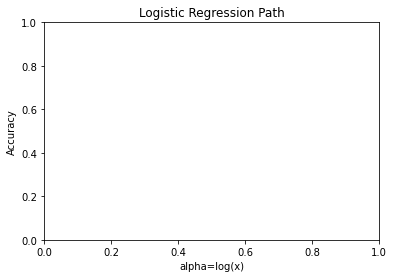

In [15]:
aproximacao(test_y, ypred_std)

In [16]:
mean_absolute_error(test_y, ypred_std)

0.52

### Ridge Regression

In [17]:
ridge_train = []
ridge_test = []
for penalty in np.logspace(-0.5, 2, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    ridge = Ridge(alpha=penalty, normalize=True)
    ridge.fit(train_X, train_y)
    
    scoresRidge = cross_val_score(ridge, train_X, train_y, cv=10)
    ridge_train.append(scoresRidge.mean())
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scoresRidge.mean(), scoresRidge.std() * 2))
    print("Score test : %0.2f" % (ridge.score(X_test_scaled, test_y)))
    ypred_ridge = ridge.predict(X_test_scaled)
    print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_ridge.mean(), ypred_ridge.std() * 2))
    print("Absolute Error: %f " % (np.sum(abs(test_y - ypred_ridge))))
    print("Mean absolute error: %0.2f" % (mean_absolute_error(test_y, ypred_ridge)))
    ridge_test.append(1-mean_absolute_error(test_y, ypred_ridge))

-----------------------l2 = 0.316228 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.37
Estimativas: 0.64 (+/- 0.12)
Absolute Error: 27.053896 
Mean absolute error: 0.54
-----------------------l2 = 0.477058 --------------------
Score cross-validation: 0.87 (+/- 0.07)
Score test : -0.21
Estimativas: 0.58 (+/- 0.08)
Absolute Error: 26.051743 
Mean absolute error: 0.52
-----------------------l2 = 0.719686 --------------------
Score cross-validation: 0.86 (+/- 0.07)
Score test : -0.11
Estimativas: 0.52 (+/- 0.09)
Absolute Error: 25.128134 
Mean absolute error: 0.50
-----------------------l2 = 1.085711 --------------------
Score cross-validation: 0.85 (+/- 0.07)
Score test : -0.05
Estimativas: 0.48 (+/- 0.12)
Absolute Error: 24.353135 
Mean absolute error: 0.49
-----------------------l2 = 1.637894 --------------------
Score cross-validation: 0.84 (+/- 0.07)
Score test : -0.02
Estimativas: 0.44 (+/- 0.15)
Absolute Error: 23.785982 
Mean absolute error: 0.48
-----

In [18]:
ridge = Ridge(alpha=5, normalize=True)
ridge.fit(train_X, train_y)
ridge.intercept_, ridge.coef_

(0.4524813289270614,
 array([-5.60508204e-03, -2.58384217e-06,  2.25061196e-03,  1.05287358e-03,
         1.04869411e-02,  1.83555742e-02,  1.14459040e-02,  0.00000000e+00,
         9.39821878e-03,  5.56345105e-02, -8.35360137e-03,  1.82417184e-03,
         6.18500578e-03,  4.45211702e-03,  2.66116538e-03,  4.24592861e-03,
         5.96099453e-03,  3.60988089e-03,  2.55698775e-02,  2.95601401e-03,
         2.40531677e-03,  2.84542409e-02,  2.04627002e-02,  4.97679298e-03,
         6.09491579e-03,  4.95049011e-03,  1.18921630e-02,  1.72142353e-02,
         3.39288444e-07,  1.96950412e-05, -1.15643494e-05,  2.32611762e-06,
         3.39937736e-06,  1.97518027e-03,  1.85936001e-04,  1.23973601e-02,
        -2.81134897e-04,  2.51163391e-05,  3.61932248e-03,  8.69230218e-07,
         1.62565611e-06,  9.17719020e-05,  2.22866409e-07,  6.49390494e-02,
         9.07907767e-05, -4.23190312e-05,  4.05058067e-04,  1.32275769e-06,
         3.76926340e-06,  8.98328150e-05,  1.75493076e-06,  2.45650

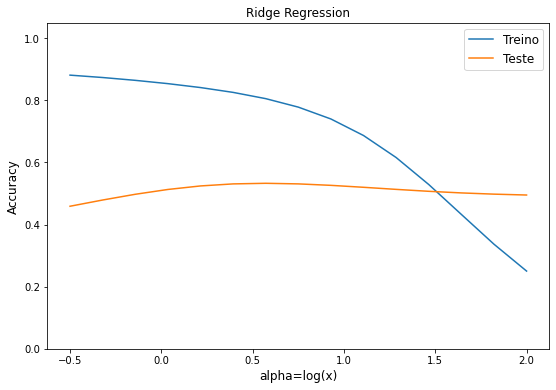

In [19]:
plot(ridge_train, ridge_test, np.linspace(-0.5, 2, num=15), 'Ridge Regression')

In [20]:
#Com PCA
for penalty in np.logspace(-0.5, 2, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    ridge = Ridge(alpha=penalty)
    ridge.fit(principalComponents, train_y)
    
    scoresRidge = cross_val_score(ridge, principalComponents, train_y, cv=10)
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scoresRidge.mean(), scoresRidge.std() * 2))
    print("Score test : %0.2f" % (ridge.score(pca_test, test_y)))
    ypred_ridge_pca = ridge.predict(pca_test)
    print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_ridge_pca.mean(), ypred_ridge_pca.std() * 2))
    print("Absolute Error: %f " % (np.sum(abs(test_y - ypred_ridge_pca))))    
    print("Mean absolute error: %0.2f" % (mean_absolute_error(test_y, ypred_ridge_pca)))

-----------------------l2 = 0.316228 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.558914 
Mean absolute error: 0.49
-----------------------l2 = 0.477058 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.559100 
Mean absolute error: 0.49
-----------------------l2 = 0.719686 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.559381 
Mean absolute error: 0.49
-----------------------l2 = 1.085711 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.559805 
Mean absolute error: 0.49
-----------------------l2 = 1.637894 --------------------
Score cross-validation: 0.88 (+/- 0.06)
Score test : -0.08
Estimativas: 0.48 (+/- 0.17)
Absolute Error: 24.560443 
Mean absolute error: 0.49
-----

### Lasso

In [21]:
for l1_penalty in np.logspace(-5, -2, num=15):
    print("-----------------------l2 = %f --------------------" % (l1_penalty))
    model = Lasso(alpha=l1_penalty, normalize=True)
    model.fit(train_X, train_y)
    modelCV = cross_val_score(model, train_X, train_y, cv=10)
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (modelCV.mean(), modelCV.std() * 2))
    print("Score test : %0.2f" % (model.score(X_test_scaled, test_y)))
    ypred_lasso = model.predict(X_test_scaled)
    print("Estimativas: %0.2f (+/- %0.2f)" % (ypred_lasso.mean(), ypred_lasso.std() * 2))
    print("Absolute Error: %f " % (np.sum(abs(test_y - ypred_lasso))))        
    print("Mean absolute error: %0.2f" % (mean_absolute_error(test_y, ypred_lasso)))

-----------------------l2 = 0.000010 --------------------


D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4600238766212499, tolerance: 0.013073954372623587
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2673037355906276, tolerance: 0.01176744186046511
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49569186939000076, tolerance: 0.01171797040169135
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

Score cross-validation: 0.90 (+/- 0.06)
Score test : -4.31
Estimativas: 1.30 (+/- 0.58)
Absolute Error: 47.244178 
Mean absolute error: 0.94
-----------------------l2 = 0.000016 --------------------


D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04675692400024367, tolerance: 0.013073954372623587
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05701513829323446, tolerance: 0.01176744186046511
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08281293087688368, tolerance: 0.01171797040169135
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

Score cross-validation: 0.90 (+/- 0.06)
Score test : -4.79
Estimativas: 1.36 (+/- 0.59)
Absolute Error: 49.770739 
Mean absolute error: 1.00
-----------------------l2 = 0.000027 --------------------


D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018247073478526943, tolerance: 0.013073954372623587
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020365389576411985, tolerance: 0.01176744186046511
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01726869461852676, tolerance: 0.01171797040169135
  positive)
D:\Dudu\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Score cross-validation: 0.90 (+/- 0.06)
Score test : -3.87
Estimativas: 1.24 (+/- 0.59)
Absolute Error: 44.579029 
Mean absolute error: 0.89
-----------------------l2 = 0.000044 --------------------
Score cross-validation: 0.90 (+/- 0.06)
Score test : -3.15
Estimativas: 1.14 (+/- 0.59)
Absolute Error: 40.746707 
Mean absolute error: 0.81
-----------------------l2 = 0.000072 --------------------
Score cross-validation: 0.91 (+/- 0.06)
Score test : -2.82
Estimativas: 1.09 (+/- 0.58)
Absolute Error: 39.113632 
Mean absolute error: 0.78
-----------------------l2 = 0.000118 --------------------
Score cross-validation: 0.91 (+/- 0.06)
Score test : -2.55
Estimativas: 1.05 (+/- 0.55)
Absolute Error: 37.851175 
Mean absolute error: 0.76
-----------------------l2 = 0.000193 --------------------
Score cross-validation: 0.90 (+/- 0.05)
Score test : -1.82
Estimativas: 0.94 (+/- 0.46)
Absolute Error: 34.519511 
Mean absolute error: 0.69
-----------------------l2 = 0.000316 --------------------
Score

In [22]:
model = Lasso(alpha=0.01, normalize=True)
model.fit(train_X, train_y)
model.coef_

array([-0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.02905918,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

### Logistic Regression

In [12]:
rog_train = []
rog_test = []
for penalty in np.logspace(-2, 5, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    logReg = LogisticRegression(C=penalty, max_iter=100).fit(X_train_scaled, train_y)
    scores = cross_val_score(logReg, X_train_scaled, train_y, cv=10)
    rog_train.append(scores.mean())
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Score test : %0.2f" % (logReg.score(X_test_scaled, test_y)))
    rog_test.append(logReg.score(X_test_scaled, test_y))

-----------------------l2 = 0.010000 --------------------
Score cross-validation: 0.98 (+/- 0.04)
Score test : 0.48
-----------------------l2 = 0.031623 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 0.100000 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 0.316228 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 1.000000 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 3.162278 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 10.000000 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.50
-----------------------l2 = 31.622777 --------------------
Score cross-validation: 0.99 (+/- 0.03)
Score test : 0.52
-----------------------l2 = 100.000000 --------------------
Score cros

In [10]:
logReg = LogisticRegression(C=0.5, max_iter=500).fit(X_train_scaled, train_y)
logReg.intercept_, logReg.coef_

(array([0.59307501]),
 array([[-1.13626282e-01, -2.07788403e-02,  3.68397690e-01,
          5.86741035e-01,  2.70187900e-01,  3.19832410e-01,
          1.64556010e-01,  0.00000000e+00,  1.23000416e-01,
          2.93131866e-01, -1.04779860e-01,  1.88543536e-01,
          1.41137047e-01, -1.27748518e-01,  1.03607806e-02,
         -1.26171353e-01,  3.98138827e-02,  1.41958733e-01,
          3.19634246e-01,  5.34889725e-02,  1.17494021e-02,
          1.28657020e-01,  1.20677641e-01,  8.12506967e-02,
          9.10615001e-01, -2.18134061e-01, -1.22553565e-01,
          6.35643748e-01,  1.79692451e-01,  2.22284334e-01,
         -2.78560324e-02,  1.61022865e-01,  3.49711500e-02,
          6.43695125e-02,  1.82369015e-01,  1.55918409e-01,
         -5.23427523e-02, -9.91773351e-02, -1.65706793e-01,
          2.94986702e-01,  4.06427610e-01,  5.28374349e-01,
         -1.52889494e-01, -1.24106505e-01,  6.71842338e-03,
          7.52713197e-02, -3.51755132e-01,  1.81583913e-01,
          9.684020

In [25]:
logReg = LogisticRegression(C=10000000000, max_iter=500).fit(X_train_scaled, train_y)
logReg.intercept_, logReg.coef_

(array([1.60867634]),
 array([[-0.98584337,  0.02734101,  1.6036753 ,  3.05219005,  0.98957215,
          2.01673874,  0.6812115 ,  0.        ,  0.68015038,  0.99544504,
         -0.92840706,  0.73193924,  0.45345662, -1.29866109, -0.17550748,
         -0.62768112, -0.42702675,  0.72554207,  2.2925714 ,  0.55059895,
         -0.35348118,  0.02993871,  0.57409776,  0.68792452,  5.58290966,
         -1.40620303, -1.11172074,  3.69764499,  1.02106314,  1.09454511,
          0.05098808,  0.93197006,  0.315779  ,  0.3817662 ,  1.17848624,
          0.90780202, -0.36605711, -0.68683865, -1.33827416,  1.62479676,
          2.17641463,  2.4547728 , -1.31670673, -2.16487913, -0.53805422,
          0.39523596, -3.05047519,  0.64637824,  0.46412909,  0.38480387,
          0.03344198, -0.18992387,  0.06484199,  0.02734101, -2.43416938,
         -2.8051031 , -0.5410435 , -1.00244697, -0.01244735,  0.05880536,
         -2.03476229, -0.92840706, -0.39264686, -0.64057287,  0.57697709,
          0.9069

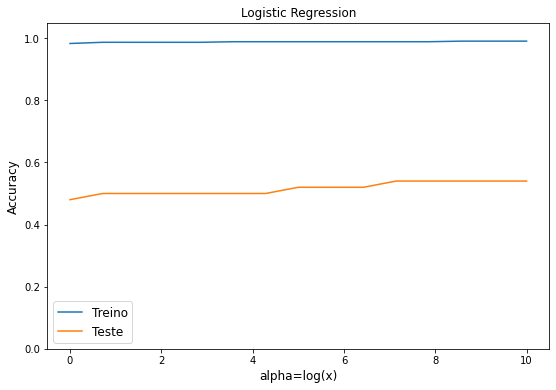

In [13]:
plot(rog_train, rog_test, np.linspace(0, 10, num=15), 'Logistic Regression')

In [14]:
#com PCA
for penalty in np.logspace(-5, 0, num=15):
    print("-----------------------l2 = %f --------------------" % (penalty))
    logReg = LogisticRegression(C=penalty, max_iter=100).fit(principalComponents, train_y)
    scores = cross_val_score(logReg, principalComponents, train_y, cv=10)
    
    print("Score cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Score test : %0.2f" % (logReg.score(pca_test, test_y)))

-----------------------l2 = 0.000010 --------------------
Score cross-validation: 0.54 (+/- 0.01)
Score test : 0.36
-----------------------l2 = 0.000023 --------------------
Score cross-validation: 0.59 (+/- 0.06)
Score test : 0.36
-----------------------l2 = 0.000052 --------------------
Score cross-validation: 0.85 (+/- 0.08)
Score test : 0.36
-----------------------l2 = 0.000118 --------------------
Score cross-validation: 0.94 (+/- 0.09)
Score test : 0.44
-----------------------l2 = 0.000268 --------------------
Score cross-validation: 0.96 (+/- 0.06)
Score test : 0.54
-----------------------l2 = 0.000611 --------------------
Score cross-validation: 0.96 (+/- 0.05)
Score test : 0.52
-----------------------l2 = 0.001389 --------------------
Score cross-validation: 0.97 (+/- 0.05)
Score test : 0.52
-----------------------l2 = 0.003162 --------------------
Score cross-validation: 0.98 (+/- 0.04)
Score test : 0.48
-----------------------l2 = 0.007197 --------------------
Score cross-va

In [28]:
logReg.score(pca_test, test_y)

0.52